In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
columns_labels = [ 'Device ID', 'accelerometer x', 'accelerometer y', 'accelerometer z',
    'gyroscope x', 'gyroscope y', 'gyroscope z', 'magnetometer x', 'magnetometer y', 'magnetometer z',
    'Timestamp', 'Activity Label']

activities = np.array(['Stand', 'Sit', 'Sit and Talk', 'Walk', 'Walk and Talk', 'Climb Stair (up/down)',
    'Climb Stair (up/down) and talk', 'Stand -> Sit', 'Sit -> Stand', 'Stand -> Sit and talk', 'Sit -> Stand and talk',
    'Stand -> walk', 'Walk -> stand', 'Stand -> climb stairs (up/down)(and talk)', 'Climb stairs (up/down) -> walk',
    'Climb stairs (up/down) and talk -> walk and talk'])

sensors = ['Acc', 'Gyr', 'Mag']

k_value = [3, 3.5, 4]

### 2. Read Files
Read files 

-> Dispositivo do pulso direito (Dev2) 

-> Leitura do pulso direito de todos os utilizadores

In [3]:
def readFiles(devi):
    dev = [0]*15
    for id in range(15):
        file = "part" + str(id)
        pasta = "dataset\part" + str(id)

        f = file + "dev" + str(devi) + ".csv"
        dir = os.path.join(pasta, f)
        dev[id] = np.genfromtxt(dir, delimiter=',')

    dFrame = pd.DataFrame(np.concatenate(dev), columns=columns_labels)
    labels = activities[dFrame['Activity Label'].astype(int)-1]
    dFrame['Label Name'] = labels
    display(dFrame)

    return [np.concatenate(dev), dFrame]

[data, dataFrame] = readFiles(2)

,Device ID,accelerometer x,accelerometer y,accelerometer z,gyroscope x,gyroscope y,gyroscope z,magnetometer x,magnetometer y,magnetometer z,Timestamp,Activity Label,Label Name
0,2.0,3.0317,9.0450,3.1739,0.76247,3.7071,-0.31384,0.57764,0.68849,1.2654,63.629,1.0,Stand
1,2.0,2.9591,9.0436,3.1400,0.40588,4.6682,-0.10148,0.58385,0.68849,1.2741,83.160,1.0,Stand
2,2.0,2.9465,9.0545,3.0799,0.24230,5.5225,0.34857,0.56522,0.67857,1.2675,102.690,1.0,Stand
3,2.0,2.7898,9.0528,3.0726,0.49858,6.3463,0.61127,0.56108,0.65476,1.2610,122.220,1.0,Stand
4,2.0,2.6924,9.0377,2.9794,0.63197,6.6972,1.00560,0.57764,0.69246,1.2675,141.750,1.0,Stand
...,...,...,...,...,...,...,...,...,...,...,...,...,...
781817,2.0,1.6802,9.5395,2.9636,0.83324,1.9832,0.87140,-0.38716,0.87103,1.3289,1042000.000,1.0,Stand
781818,2.0,1.7042,9.5639,2.9504,1.03060,1.8002,0.54192,-0.37474,0.86508,1.3399,1042000.000,1.0,Stand
781819,2.0,1.7283,9.5641,2.9496,1.05330,1.3577,0.89447,-0.35818,0.92857,1.3531,1042000.000,1.0,Stand
781820,2.0,1.7285,9.5646,2.9737,1.03550,1.4340,0.78856,-0.36232,0.90675,1.3377,1042000.000,1.0,Stand


### 3. Módulo

-> Módulo do aceleração, giroscópio, magnenómetro

-> Cálculo feito por linha da tabela

In [20]:
def modulo(dFrame):

    for i in range(16):
        acc = np.sqrt(dFrame['accelerometer x']**2 + dFrame['accelerometer y']**2 + dFrame['accelerometer z']**2)
        gir = np.sqrt(dFrame['gyroscope x']**2 + dFrame['gyroscope y']**2 + dFrame['gyroscope z']**2)
        mag = np.sqrt(dFrame['magnetometer x']**2 + dFrame['magnetometer y']**2 + dFrame['magnetometer z']**2)

    data = pd.DataFrame({'ID': dFrame['Device ID'], 'Acc': acc, 'Gyr': gir, 'Mag': mag, 
                            'Label ID': dFrame['Activity Label'].astype(int), 'Label Name': dFrame['Label Name']})

    display(data)

    return data

mod_data = modulo(dataFrame)

,ID,Acc,Gyr,Mag,Label ID,Label Name
0,2.0,10.053699,3.797690,1.552071,1,Stand
1,2.0,10.020108,4.686910,1.561483,1,Stand
2,2.0,10.007578,5.538792,1.544826,1,Stand
3,2.0,9.958767,6.395135,1.527626,1,Stand
4,2.0,9.889685,6.801699,1.555547,1,Stand
...,...,...,...,...,...,...
781817,2.0,10.129564,2.320928,1.635409,1,Stand
781818,2.0,10.152701,2.143953,1.638330,1,Stand
781819,2.0,10.156730,1.937232,1.679707,1,Stand
781820,2.0,10.164260,1.936606,1.656174,1,Stand


### 3.1 Boxplot dos módulos

-> Boxplot de cada módulo agrupado por atividade (Label ID)

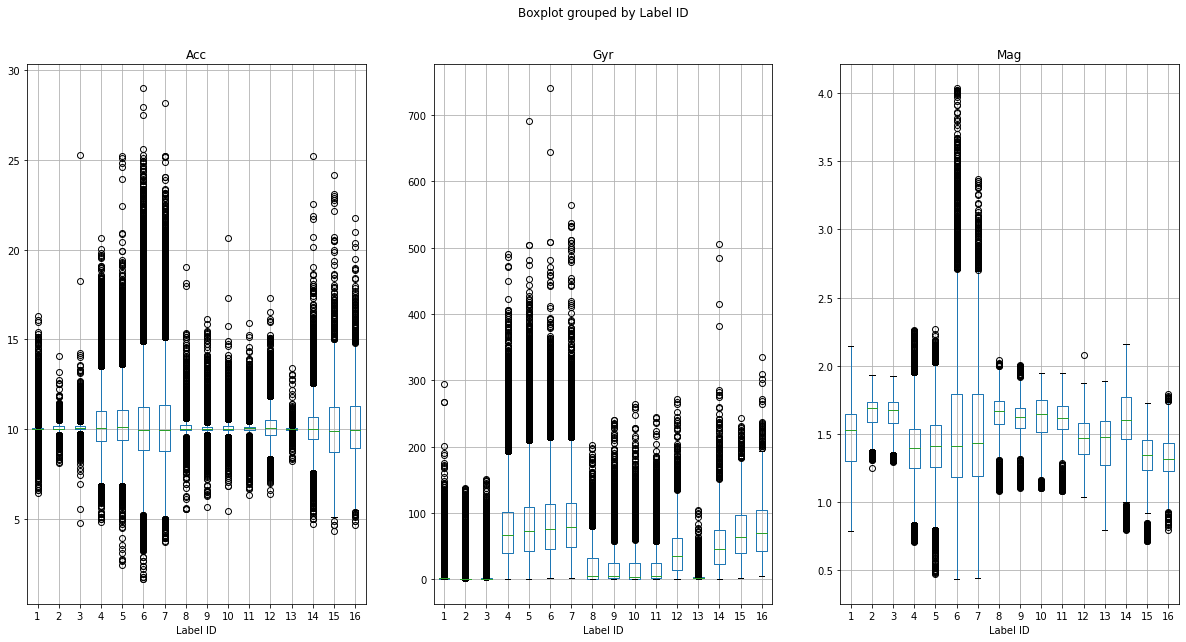

In [41]:
def boxplot(mod_data):
    fig, axes = plt.subplots(1,3, figsize=(20,10))

    mod_data.boxplot(by ='Label ID', column = ['Acc'], ax=axes.flatten()[0])
    mod_data.boxplot(by ='Label ID', column = ['Gyr'], ax=axes.flatten()[1])
    mod_data.boxplot(by ='Label ID', column = ['Mag'], ax=axes.flatten()[2])

boxplot(mod_data)

### 3.2 Densidade

[Q1 − k × IQR,Q3 + k × IQR] -> Not outlier

d = (n0 / nr) * 100

In [73]:
def outliers(data_act, sensor):
    k = 1.5
    quantil = data_act[sensor].quantile([0.25,0.75])
    iqr = quantil[0.75] - quantil[0.25]
    limite = [quantil[0.25] - k*iqr, quantil[0.75] + k*iqr]

    out = data_act.loc[(data_act[sensor] < limite[0]) | (data_act[sensor] > limite[1])] 
    not_out = data_act.loc[(data_act[sensor] >= limite[0]) & (data_act[sensor] <= limite[1])]

    return [out, not_out]


def density(mod_data):
    den = [pd.DataFrame(np.arange(1,17)), pd.DataFrame(activities)]
    den[0].columns = ['Label']
    den[1].columns = ['Label Name']

    for s in sensors:
        aux = [[],[],[]]
        for id in range(1,17):
            activity = mod_data.loc[mod_data["Label ID"] == id]
            n_total = activity.shape[0]
            [out, not_out] = outliers(activity, s)

            d = (out.shape[0]/n_total)*100

            aux[0].append(n_total) # Número de total de pontos
            aux[1].append(out.shape[0]) # Número de outliers
            aux[2].append(d) # Densidade

        aux[0] = pd.DataFrame(aux[0])
        aux[0].columns = [s + ' N_Total']
        aux[1] = pd.DataFrame(aux[1])
        aux[1].columns = [s + ' N_Outliers']
        aux[2] = pd.DataFrame(aux[2])
        aux[2].columns= [s + ' Density']

        aux = pd.concat(aux, axis=1)

        den.append(aux)


    den = pd.concat(den, axis=1)
    den.index = np.arange(1,17)
    
    return den
        

den = density(mod_data)
display(den)


,Label,Label Name,Acc N_Total,Acc N_Outliers,Acc Density,Gyr N_Total,Gyr N_Outliers,Gyr Density,Mag N_Total,Mag N_Outliers,Mag Density
1,1,Stand,157882,6624,4.195538,157882,14975,9.484932,157882,0,0.000000
2,2,Sit,83968,181,0.215558,83968,5581,6.646580,83968,5603,6.672780
3,3,Sit and Talk,81152,417,0.513851,81152,7399,9.117459,81152,3868,4.766364
4,4,Walk,139934,4941,3.530950,139934,2268,1.620764,139934,2030,1.450684
5,5,Walk and Talk,142366,4951,3.477656,142366,2033,1.428009,142366,1906,1.338803
6,6,Climb Stair (up/down),89359,4616,5.165680,89359,1339,1.498450,89359,349,0.390559
7,7,Climb Stair (up/down) and talk,43791,1977,4.514626,43791,908,2.073485,43791,97,0.221507
8,8,Stand -> Sit,6656,1028,15.444712,6656,497,7.466947,6656,232,3.485577
9,9,Sit -> Stand,5632,1115,19.797585,5632,607,10.777699,5632,414,7.350852
10,10,Stand -> Sit and talk,6656,1020,15.324519,6656,688,10.336538,6656,56,0.841346


### 3.3 Z-Score

z = (X - media) / std

|z| < k -> z <= k & z >= -k

In [91]:
def z_score(activity, k):
    m = activity.mean()
    s = activity.std()
    z = (activity - m) / s

    out = z.loc[(z < -k) | (z > k)]
    not_out = z.loc[(z <= k) & (z >= -k)]

    return [out, not_out]

    

def zscore(mod_data, den, sensor):
    n_outliers = []
    for id in range(1,17):
        aux = []
        activity = mod_data.loc[mod_data["Label ID"] == id, sensor]
        for k in k_value:
            [out, not_out] = z_score(activity, k)

            aux.append(out.shape[0])
            
        aux = pd.DataFrame(aux)
        aux.columns = [id]
        aux.index = k_value

        n_outliers.append(aux)

    n_outliers = pd.concat(n_outliers, axis=1)
    n_outliers = n_outliers.transpose()

    data_zscore = pd.concat([den[['Label', 'Label Name', sensor + ' N_Total', sensor + ' N_Outliers']], n_outliers], axis=1)

    display(data_zscore)

    
zscore(mod_data, den, 'Acc')


,Label,Label Name,Acc N_Total,Acc N_Outliers,3.0,3.5,4.0
1,1,Stand,157882,6624,1328,1123,977
2,2,Sit,83968,181,199,173,155
3,3,Sit and Talk,81152,417,295,245,216
4,4,Walk,139934,4941,1497,681,283
5,5,Walk and Talk,142366,4951,1522,720,302
6,6,Climb Stair (up/down),89359,4616,1163,573,288
7,7,Climb Stair (up/down) and talk,43791,1977,595,292,152
8,8,Stand -> Sit,6656,1028,122,91,76
9,9,Sit -> Stand,5632,1115,143,106,77
10,10,Stand -> Sit and talk,6656,1020,148,99,68
